In [1]:
import pandas as pd
import numpy as np
from numpy import nan, NaN,NAN
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import math

In [4]:
orig_df=pd.read_csv("Jamboree_Admission.csv")

In [5]:
df=orig_df.copy()
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
#drop Serial No> column
df.drop("Serial No.",axis=1,inplace=True)

In [9]:
#Chance of Admit  column renamed as an extra space found at its end
df.rename(columns={"Chance of Admit ":"Chance of Admit"},inplace=True)

In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## **Comparing the mean and median of the independent Variables suggest not much of outliers could be there.The same is rechecked in the boxplot of these variables below**

In [11]:
#Missing Value Detection
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## **No missing values are present in any of the columns**

In [12]:
##Checking Duplicates
df.loc[df.sort_values(["GRE Score"]).duplicated()==True]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


## **No duplicates are present**

In [13]:
#Categorical columns and % of each values there
for col in df.columns:
    if col in("GRE Score","TOEFL Score","CGPA","Chance of Admit"):
        continue
    else:
        print("% of each of the unique values in column",col)
        print(df[col].value_counts(normalize=True)*100)
        print("*"*50)

% of each of the unique values in column University Rating
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64
**************************************************
% of each of the unique values in column SOP
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: SOP, dtype: float64
**************************************************
% of each of the unique values in column LOR 
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: LOR , dtype: float64
**************************************************
% of each of the unique values in column Research
1    56.0
0    44.0
Name: Research, dtype: float64
**************************************************


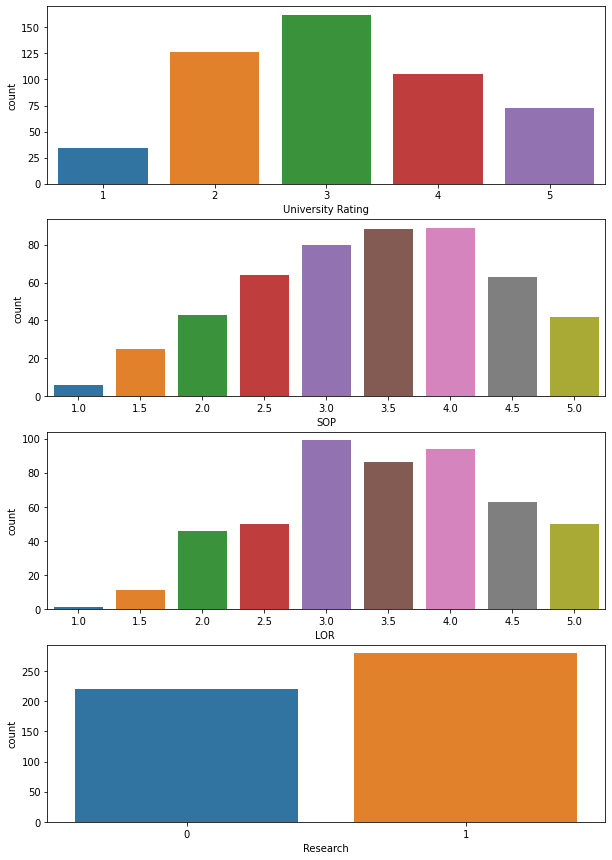

In [15]:
#Univariate analysis of categorical columns
i=411
plt.rcParams["figure.figsize"] = (10,15)
for col in df.columns:
    
    if col in("GRE Score","TOEFL Score","CGPA","Chance of Admit"):
        continue
    else:
        plt.subplot(i)
        
        sns.countplot(df[col])
        i+=1
        

## **Observations from Univariate and Non Graphical representations of categorical Variables** ##
## **1)The Categorical columns identified are University Rating,SOP,LOR and Research** ##
## **2)University Rating -3 topped the list with 33% applicants and least is from rating 1** ##
## **3)Applicants with SOP rating 4 and 3.5 has applied more to the graduate programs** ##
## **4)Applicants with LOR rating 3 and 4 has applied more for the graduate programs** ##
## **5)Applicants who has done some research work has applied more ,However applicants not done any research work has also applied with a ratio of 14:11** ##


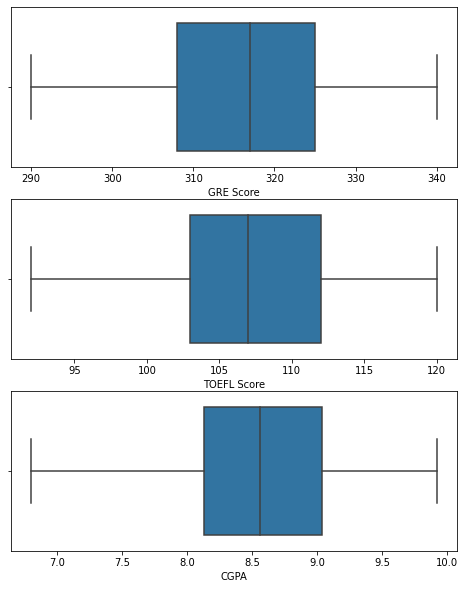

In [16]:
i=311

for col in ("GRE Score","TOEFL Score","CGPA"):
    plt.rcParams["figure.figsize"] = (8,10)
    plt.subplot(i)
    sns.boxplot(df[col])
    i+=1

## **These Boxplots suggests there are no outliers in GRE TOEFL and CGPA scores** ##

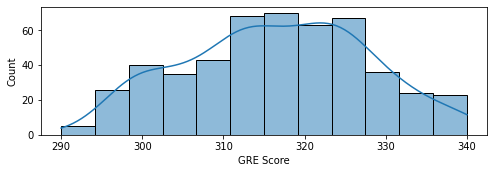

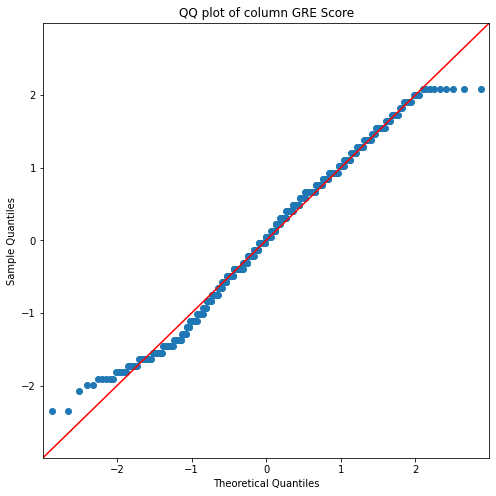

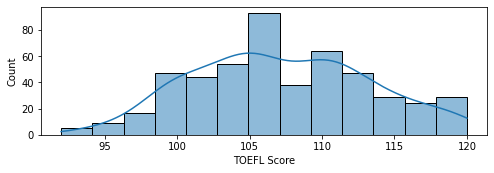

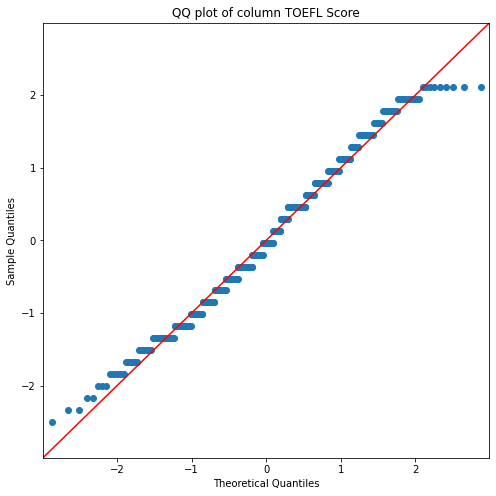

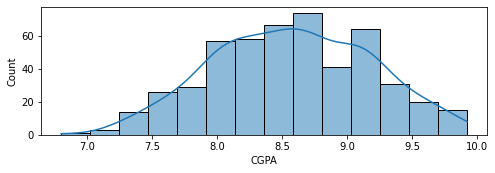

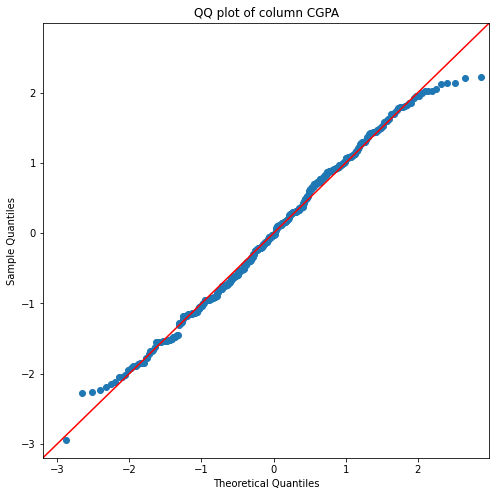

In [17]:
#Univariate of continous features
i=311

for col in ("GRE Score","TOEFL Score","CGPA"):
    plt.rcParams["figure.figsize"] = (8,8)
    plt.subplot(i)
    sns.histplot(df[col],kde=True)
    
    fig=sm.qqplot(df[col],line='45',fit=True)
    ttle="QQ plot of column "+col
    plt.title(ttle)
    
    plt.show()
    i+=1


## **Observations from Univariate Analysis of continous Features**
## **1)GRE Score,TOEFL Score and CGPA rating are observed as continous features** ##
## **2)The boxplot of these columns suggests there ae no outliers in data.** ##
## **3)The Density plots suggests that these features doesn't follow a perfect gaussian.The QQplots also confirms the same** ##

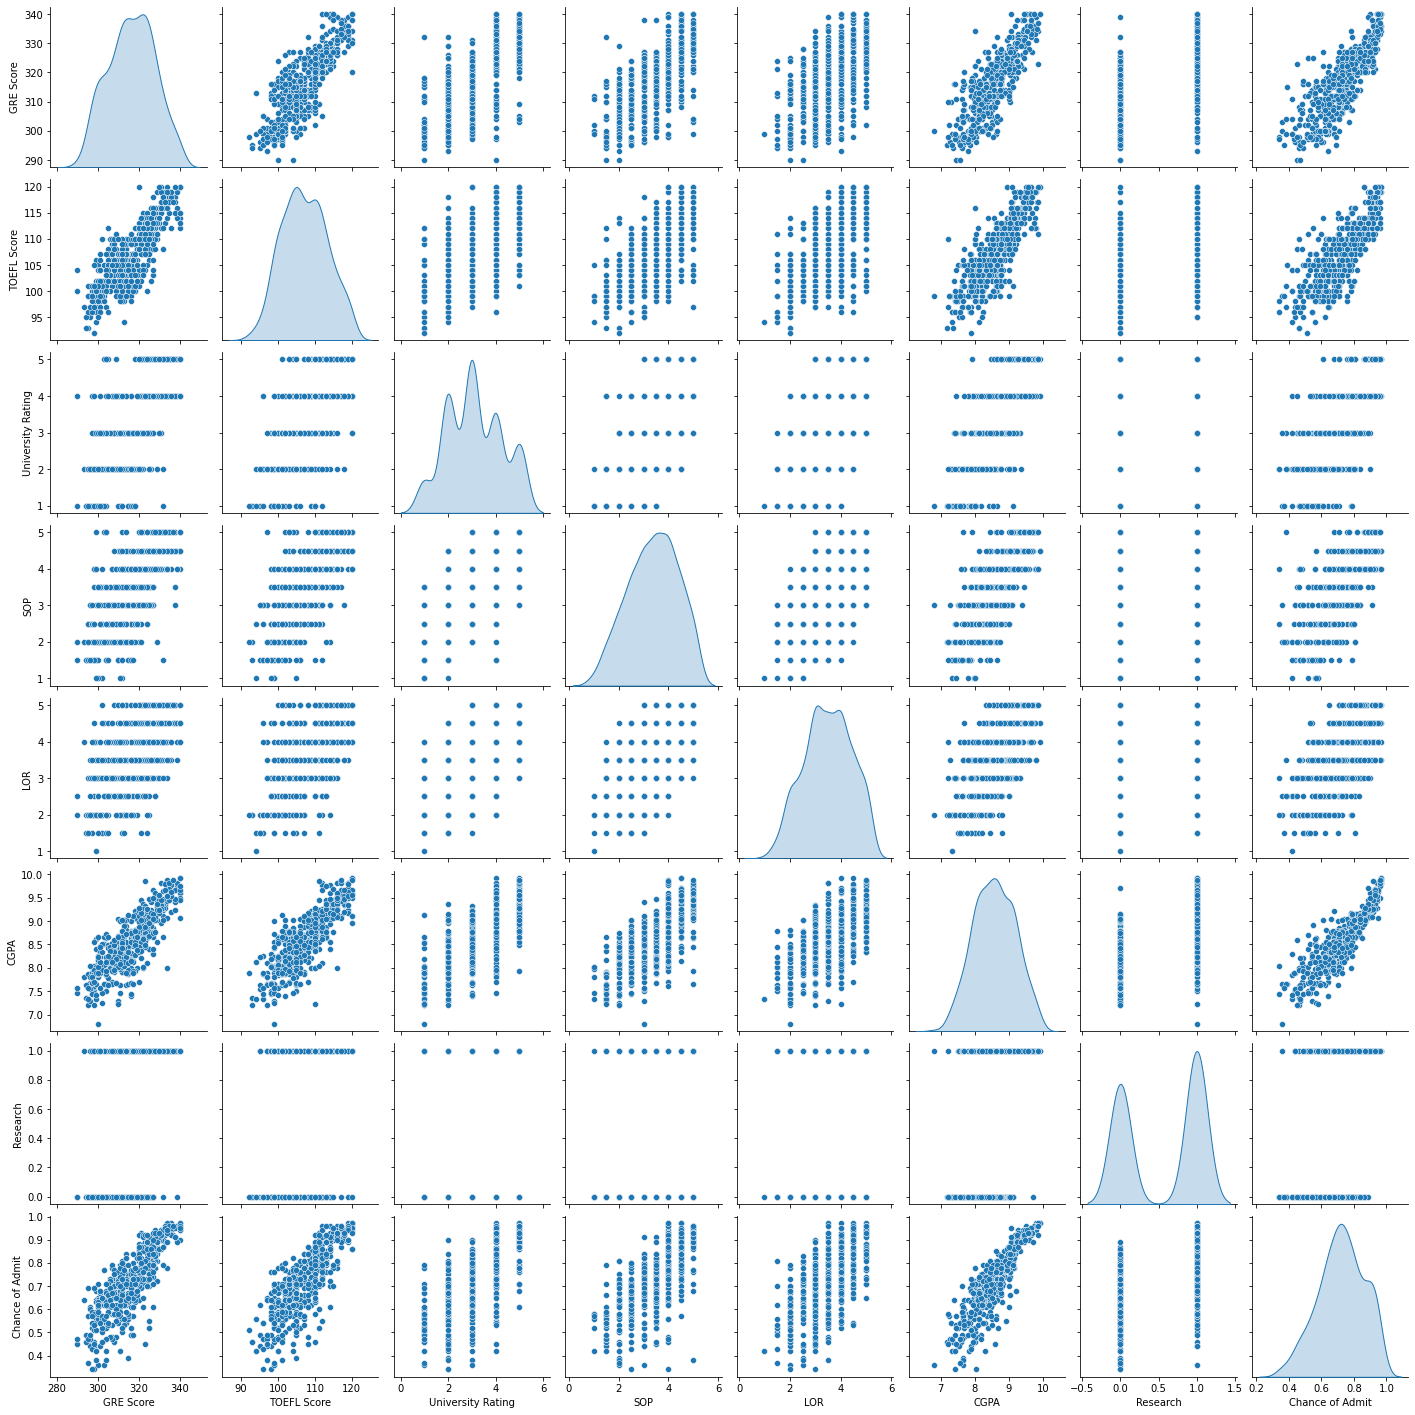

In [18]:
#Bivariate Analysis
sns.pairplot(df,diag_kind='kde')

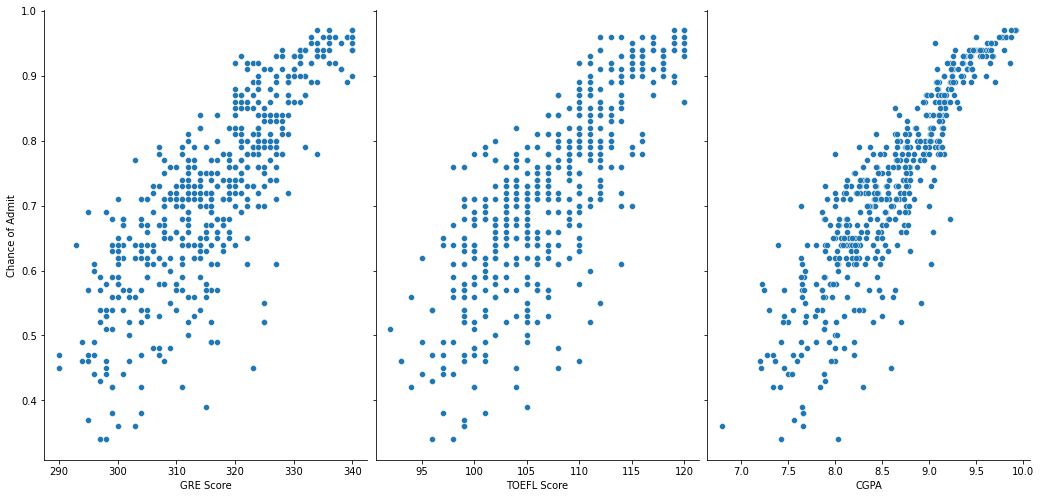

In [24]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=["GRE Score","TOEFL Score","CGPA"], y_vars='Chance of Admit',size=7, aspect=0.7, kind='scatter')
plt.show()

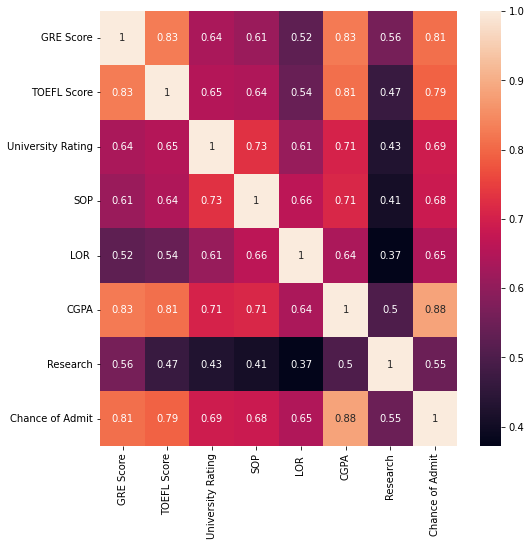

In [25]:

sns.heatmap(df.corr(),annot=True)
plt.show()

## **The bivariate analysis of continuous numeric features shows almost a  linear  relatonships between them.** ##
## **The scatter plot between the Chance of Admit(target var) shows a linear relationship with the other continous numeric fetaures(GRE,TOEFLand CGPA scores.The assumption of Linear Regression is true here.Rest of the assumptions to be checked after doing Regression Analysis** ##
## **The heatmap shows the most of the independent numeric variables(for instance GRE,TOEFL and CGPA) are positively correlated.The assumption that there should not be any correlation within independent features (multicollinearity) is been violated here** ##
## **The target variable (Chance of Admit)is also positively correlated with the independent features. The highest  correlation coefficients are found with CGPA ,GRE and TOEFL score respectively.** ##
 

In [229]:
#Standardizing data

from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
df_scaled=s_scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


In [231]:
#Independent features in x,dependent in y
x=df_scaled.iloc[:,0:7]

#target var in y
y=df_scaled.iloc[:,7:8]

In [233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=1)

In [234]:
x_train.shape
ones=np.ones((len(x_train),1))
x_train_new=np.hstack((ones,x_train))
x_train_new.shape

(400, 8)

In [68]:
#Linear Regression Implementation from scartch

def predict(x,w):
    y_pred=np.dot(x,w)
    return y_pred

In [108]:
def error(x,y,w):
    y_hat=predict(x,w)
    err=np.mean(( y-y_hat)**2)
    return err

In [69]:
def gradient(x,y,w):
    y_pred=predict(x,w)
    temp=y_pred-y
    grad=np.dot(x.T,temp)
    grad=grad*2/len(x)
    return grad

In [174]:
def gradient_descent(x,y,eta,epochs):
    w=np.random.randn(x.shape[1],1)
    err_list=[]
    #print("w",w)
    for _ in range(epochs):
        grad=gradient(x,y,w)
        #print("grad",grad)
        w-=eta*grad
        y_pred=predict(x,w)
        err=error(x,y,w)
        err_list.append(err)
    return w.round(3),y_pred,err_list

In [235]:
opt_weights,y_hat_new,errlist=gradient_descent(x_train_new,y_train.values,.1,400)


In [236]:
print("Intercept is",opt_weights[0])
opt_weights=np.delete(opt_weights,0)
for idx,col in enumerate (x.columns):
    print("The coefficient for column ",col,"is",opt_weights[idx])


Intercept is [0.008]
The coefficient for column  GRE Score is 0.147
The coefficient for column  TOEFL Score is 0.137
The coefficient for column  University Rating is 0.05
The coefficient for column  SOP is 0.021
The coefficient for column  LOR  is 0.095
The coefficient for column  CGPA is 0.5
The coefficient for column  Research is 0.07


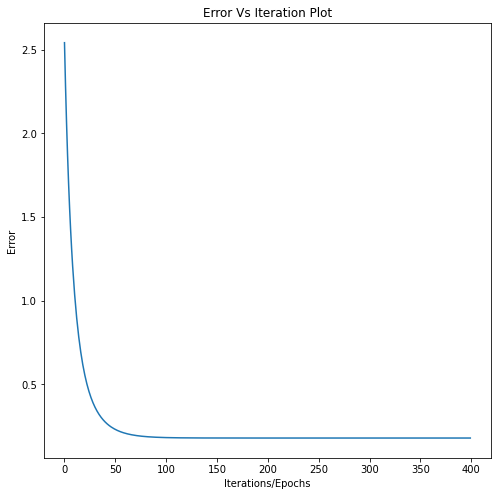

In [237]:
plt.plot(errlist)
plt.xlabel("Iterations/Epochs")
plt.ylabel("Error")
plt.title("Error Vs Iteration Plot")
plt.show()

In [238]:
#Linear Regression from scikit learn package
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr

LinearRegression()

In [239]:
# print the intercept
print(lr.intercept_)

[0.0080945]


In [240]:
for idx,col in enumerate (x.columns):
    print("The coefficient for column ",col,"is",lr.coef_[0][idx].round(3))

The coefficient for column  GRE Score is 0.147
The coefficient for column  TOEFL Score is 0.137
The coefficient for column  University Rating is 0.05
The coefficient for column  SOP is 0.021
The coefficient for column  LOR  is 0.095
The coefficient for column  CGPA is 0.5
The coefficient for column  Research is 0.07


## **The intercept and Coefficients found through code implemenation and Scikit learn package of Linear Regression is found to be the same** ##

In [241]:
# Making predictions using the model
y_pred = lr.predict(x_test)

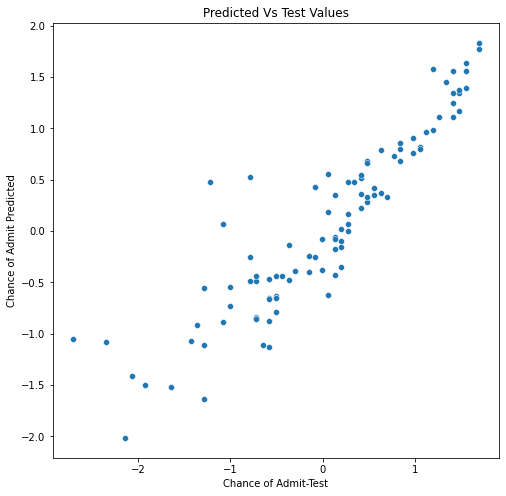

In [242]:
y_pred1=y_pred.reshape(len(y_pred,))
y_test1=y_test.values.reshape(len(y_test),)
plt.title("Predicted Vs Test Values")
plt.xlabel("Chance of Admit-Test")
plt.ylabel("Chance of Admit Predicted")
sns.scatterplot(y_test1,y_pred1)
plt.show()

In [243]:
scipy.stats.pearsonr(y_test1,y_pred1)

(0.9075240795837203, 1.0589403866085569e-38)

## **The scatter plot between the predicted and test data shows a strong Positive correlation with a Pearson Correlation Coefficient of 0.91 .Since P-val is very much less compared to alpha(.05) it can be  concluded that there is a statistically significant correlation between the two variables** ##

In [244]:
#Error term calculations
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

In [245]:
#adjusted R^2
n=len(x)
d=x.shape[1]
r2=lr.score(x_test, y_test)
num=(1-r2)*(n-1)
den=n-d-1
adj_r2=1-(num/den)


In [246]:
print('Mean_Squared_Error :' ,mse)
print("Root Mean Square Error :",rmse)
print('R_square_value :',r_squared)
print('Adjusted R_square_value :',adj_r2)

Mean_Squared_Error : 0.17399217834898525
Root Mean Square Error : 0.4171236967003736
R_square_value : 0.8208741703103732
Adjusted R_square_value : 0.8183256320830818


In [247]:
lr.score(x_train, y_train)

0.8215099192361264

In [248]:
lr.score(x_test, y_test)

0.8208741703103732

## **The model is giving comparable scores on both train and test data.** ##

## **Model Evaluation through OLS** ##

In [266]:

x_train_sm = x_train

x_train_sm = sm.add_constant(x_train_sm)

lr_ols = sm.OLS(y_train,x_train_sm).fit()

In [268]:
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sat, 29 Oct 2022   Prob (F-statistic):          2.10e-142
Time:                        08:00:09   Log-Likelihood:                -224.33
No. Observations:                 400   AIC:                             464.7
Df Residuals:                     392   BIC:                             496.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0081      0.021      0.377      0.707      -0.034       0.050
GRE Score             0.1466      0.047      3.135      0.002       0.055       0.239
TOEFL Score           0.1368      0.043      3.156      0.002       0.052       0.222
University Rating     0.0497      0.036      1.387      0.166      -0.021       0.120
SOP                   0.0211      0.036      0.591      0.555      -0.049       0.091
LOR                   0.0946      0.030      3.105      0.002       0.035       0.154
CGPA                  0.5001      0.047     10.743      0.000       0.409       0.592
Research              0.0700      0.026      2.668      0.008       0.018       0.122
==============================================================================
Omnibus:                       80.594   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.116
Skew:                          -1.064   Prob(JB):                     5.14e-37
Kurtosis:                       5.346   Cond. No.                         5.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Inferences from OLS model** ##
## **Null hypothesis: A coefficient equals zero.** ##
## **Alternate Hypothesis: A coefficient is non-zero.** ##
## **Alpha=.05** ##
## **Except University Rating and SOP all other features are having P-value less than alpha,thus rejecting the null hypothesis for them .This implies University Rating and LOP are NOT so statistically significant features but the other features -GRE ,TOEFL,CGPA,LOR and Research are significant features** ##

## **Need to check whether scores can be improved by some regularization or VIF techniques.But before that lets check the rest of the assumptions of Linear Regression** ##



## **Check Assumptions of Regression** ##

In [249]:
#Mean of Residuals must be zero
residual=y_test.values-y_pred
mean_residual=np.mean(residual)
print("Mean of Residual Errro ",mean_residual)

Mean of Residual Errro  -0.04047250393168727


## **The mean of Residual error is close to zero.The Assumption that mean of Residual should be zero is met** ##

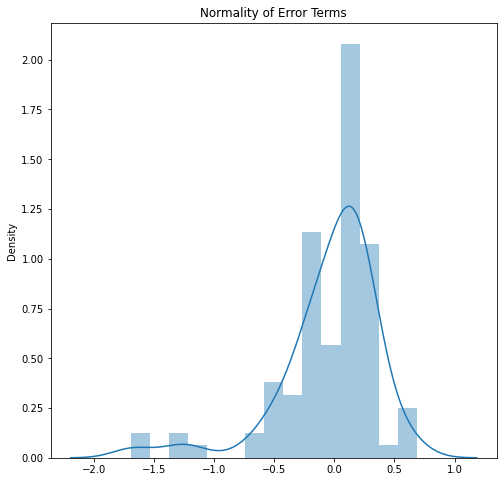

In [250]:
#Checking Normality of Residuals
sns.distplot(residual)
plt.title("Normality of Error Terms")
plt.show()

Text(0.5, 1.0, 'QQ plot of Error Term')

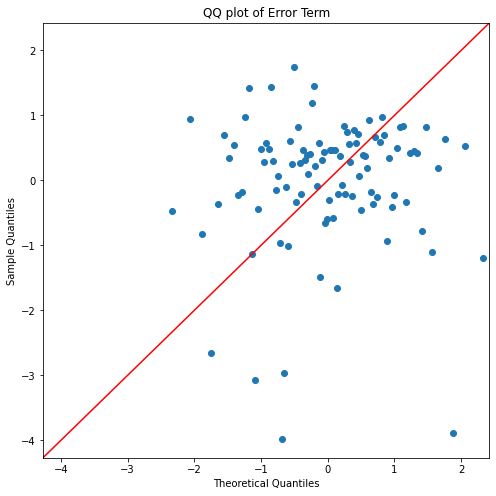

In [251]:
fig=sm.qqplot(residual,line='45',fit=True)
plt.title("QQ plot of Error Term")

## **QQplot suggests the distribution of Error term is not Gaussian.The Assumption that error term must be normally distributed  is violated here** ##

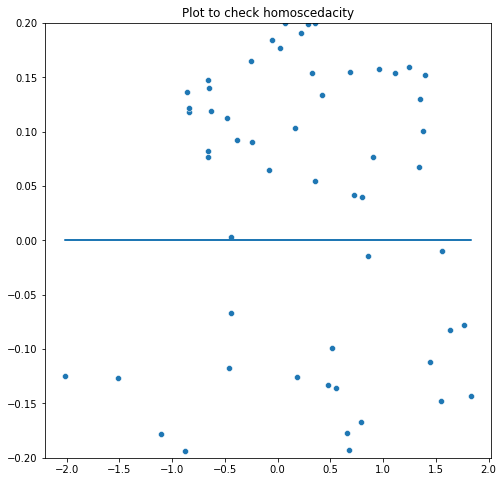

In [252]:
#Check for Homoscedacity
y_pred1=y_pred.reshape(len(y_pred,))
residual1=residual.reshape(len(residual,))
sns.scatterplot(y_pred1,residual1)
plt.plot(y_pred1,[0]*len(y_pred1))
plt.ylim(-.20,.20)
plt.title("Plot to check homoscedacity")
plt.show()

## **The plot shows the error terms are not having a constant error,meaning a constant deviation of the points from the zero-line.The Assumption that error points must be Homoscedastic(constant variance) is violated here** ##

In [263]:
#Multicollinearity check by VIF Score
dict={"Independent_variable":x_train.columns.to_list()}
vif_data=pd.DataFrame(dict)

vif_data

,Independent_variable
0,GRE Score
1,TOEFL Score
2,University Rating
3,SOP
4,LOR
5,CGPA
6,Research


In [264]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

  Independent_variable       VIF
0            GRE Score  4.873265
1          TOEFL Score  4.243883
2    University Rating  2.798252
3                  SOP  2.920046
4                 LOR   2.079334
5                 CGPA  4.751389
6             Research  1.508148


## **GRE and CGPA scores are having VIF close to 5.Lets remove each features with high correlation and see whether VIF can be furthur decreased** ##

In [265]:
to_remove=["GRE Score","TOEFL Score","CGPA","SOP","LOR ","University Rating","Research"]
for i in range(1,7):
    col=to_remove[0]
    print("Column removed:",to_remove[0])
    temp=col
    to_remove.remove(col)
    dict={"Independent_variable":to_remove}
    vif_data=pd.DataFrame(dict)
    z=x_train[to_remove]
    vif_data["VIF"] = [variance_inflation_factor(z.values, i)
                          for i in range(len(z.columns))]
    print(vif_data)
    print("*"*50)
    to_remove.append(temp)
    

Column removed: GRE Score
  Independent_variable       VIF
0          TOEFL Score  3.172077
1                 CGPA  4.047662
2                  SOP  2.898993
3                 LOR   2.077342
4    University Rating  2.778198
5             Research  1.382618
**************************************************
Column removed: TOEFL Score
  Independent_variable       VIF
0                 CGPA  4.432872
1                  SOP  2.881384
2                 LOR   2.078952
3    University Rating  2.788387
4             Research  1.505166
5            GRE Score  3.642506
**************************************************
Column removed: CGPA
  Independent_variable       VIF
0                  SOP  2.811632
1                 LOR   2.003945
2    University Rating  2.754280
3             Research  1.506100
4            GRE Score  4.151487
5          TOEFL Score  3.959388
**************************************************
Column removed: SOP
  Independent_variable       VIF
0                 LOR   1.

## **Better VIF scores are attained when either GRE,TOEFL or  CGPA scores are removed.The Correlation heatmap also showed these three variables are highy correlated with each other** ##

## **Let's remove these three features one and one and see how the model performs** ##

In [291]:
for col in (["GRE Score","TOEFL Score","CGPA"]):
    print("Feature removed ",col)
    print(" "*50)
    x_train_new=x_train.drop(columns=col)
    x_test_new=x_test.drop(columns=col)
    model=LinearRegression()
    model.fit(x_train_new,y_train)
    print("R^2 score on train data",model.score(x_train_new,y_train))
    print("R^2 score on test data",model.score(x_test_new,y_test))

    print("Intercept",model.intercept_)
    for idx,col in enumerate (x_train_new.columns):
        print("The coefficient for ",col,"is",model.coef_[0][idx].round(3))
    print("*"*50)
    



Feature removed  GRE Score
                                                  
R^2 score on train data 0.817034907844699
R^2 score on test data 0.8140163032779809
Intercept [0.00483144]
The coefficient for  TOEFL Score is 0.205
The coefficient for  University Rating is 0.059
The coefficient for  SOP is 0.012
The coefficient for  LOR  is 0.092
The coefficient for  CGPA is 0.556
The coefficient for  Research is 0.094
**************************************************
Feature removed  TOEFL Score
                                                  
R^2 score on train data 0.8169759601258099
R^2 score on test data 0.8208580570733702
Intercept [0.01191541]
The coefficient for  GRE Score is 0.221
The coefficient for  University Rating is 0.057
The coefficient for  SOP is 0.034
The coefficient for  LOR  is 0.096
The coefficient for  CGPA is 0.538
The coefficient for  Research is 0.066
**************************************************
Feature removed  CGPA
                                       

## **It can be seen that upon removing the feature CGPA the model score has gone down to 0.76 ,whereas upon removing GRE or TOEFL the model performs similarly.Hence it can be concluded that for model building either GRE or TOEFL score is only required** ##

In [317]:
#drop TOEFL score from train data
x_train=x_train.drop(columns="TOEFL Score")

In [318]:
#drop TOEFL score from test data
x_test=x_test.drop(columns="TOEFL Score")

In [325]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("R2 score Train ",lr.score(x_train,y_train))
print("R2 score Test ",lr.score(x_test,y_test))
print("Intercept",lr.intercept_)
for idx,col in enumerate (x_train.columns):
    print("The coefficient for ",col,"is",lr.coef_[0][idx].round(3))



R2 score Train  0.8169759601258099
R2 score Test  0.8208580570733702
Intercept [0.01191541]
The coefficient for  GRE Score is 0.221
The coefficient for  University Rating is 0.057
The coefficient for  SOP is 0.034
The coefficient for  LOR  is 0.096
The coefficient for  CGPA is 0.538
The coefficient for  Research is 0.066


## **Lets Try out Ridge and Lasso Regression** ##

In [293]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [320]:
for al in (10,1,.1,.01,.001,.0001,.00001):
    print("alpha= ",al)
    lasso=Lasso(alpha=al)
    lasso.fit(x_train,y_train)
    print("R2 score Train ",lasso.score(x_train,y_train))
    print("R2 score Test ",lasso.score(x_test,y_test))


alpha=  10
R2 score Train  0.0
R2 score Test  -0.000859904976438175
alpha=  1
R2 score Train  0.0
R2 score Test  -0.000859904976438175
alpha=  0.1
R2 score Train  0.801235243457924
R2 score Test  0.7940673315195275
alpha=  0.01
R2 score Train  0.8168189972055011
R2 score Test  0.8195814045195973
alpha=  0.001
R2 score Train  0.816974432479047
R2 score Test  0.8207438032041934
alpha=  0.0001
R2 score Train  0.8169759468358017
R2 score Test  0.8208461529086528
alpha=  1e-05
R2 score Train  0.8169759597234052
R2 score Test  0.8208570406571345


## **From alpha=.001 the model is giving comparable scores both in train and test data .Hence fixing alpha=.001** ##

In [321]:
lasso=Lasso(alpha=.001)
lasso.fit(x_train,y_train)
print("Intercept",lasso.intercept_)
for idx,col in enumerate (x_train.columns):
    print("The coefficient for ",col,"is",lasso.coef_[idx].round(3))

Intercept [0.01189168]
The coefficient for  GRE Score is 0.221
The coefficient for  University Rating is 0.056
The coefficient for  SOP is 0.034
The coefficient for  LOR  is 0.095
The coefficient for  CGPA is 0.538
The coefficient for  Research is 0.066


In [322]:
for al in (10000,1000,100,10,1,.1,.01,.001,.0001,.00001):
    print("alpha= ",al)
    ridge=Ridge(alpha=al)
    ridge.fit(x_train,y_train)
    print("R2 score Train ",ridge.score(x_train,y_train))
    print("R2 score Test ",ridge.score(x_test,y_test))

alpha=  10000
R2 score Train  0.2018672825772675
R2 score Test  0.19525611011498833
alpha=  1000
R2 score Train  0.667357861973171
R2 score Test  0.6582973555199667
alpha=  100
R2 score Train  0.8046866651485974
R2 score Test  0.8056230605546815
alpha=  10
R2 score Train  0.8166086981193384
R2 score Test  0.8198988263960197
alpha=  1
R2 score Train  0.8169714825319159
R2 score Test  0.8207851809027197
alpha=  0.1
R2 score Train  0.8169759143653401
R2 score Test  0.8208510627369144
alpha=  0.01
R2 score Train  0.8169759596671988
R2 score Test  0.8208573606506699
alpha=  0.001
R2 score Train  0.8169759601212228
R2 score Test  0.8208579874612897
alpha=  0.0001
R2 score Train  0.816975960125764
R2 score Test  0.8208580501124642
alpha=  1e-05
R2 score Train  0.8169759601258094
R2 score Test  0.8208580563772827


## **From alpha=0.1 the model is giving comparable scores both in train and test data .Hence fixing alpha=0.1** ##

In [323]:
ridge=Ridge(alpha=.1)
ridge.fit(x_train,y_train)
print("Intercept",ridge.intercept_)
for idx,col in enumerate (x_train.columns):
    print("The coefficient for ",col,"is",ridge.coef_[0][idx].round(3))

Intercept [0.01191898]
The coefficient for  GRE Score is 0.221
The coefficient for  University Rating is 0.057
The coefficient for  SOP is 0.034
The coefficient for  LOR  is 0.096
The coefficient for  CGPA is 0.538
The coefficient for  Research is 0.066


In [326]:
#predict values using different models experimented
ypred_lr=lr.predict(x_test)
ypred_lasso=lasso.predict(x_test)
ypred_ridge=ridge.predict(x_test)

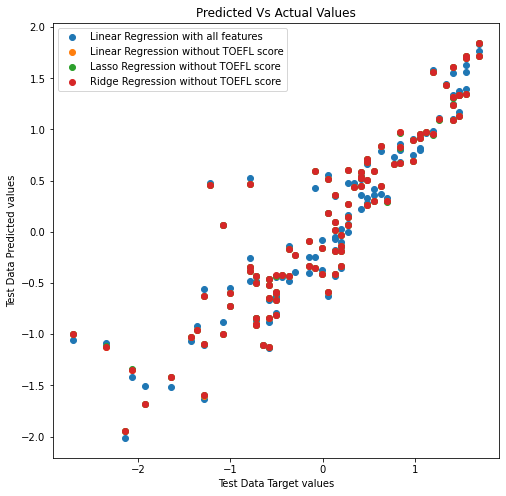

In [345]:
plt.scatter(y_test,y_pred,label="Linear Regression with all features")
plt.scatter(y_test,ypred_lr,label='Linear Regression without TOEFL score')
plt.scatter(y_test,ypred_lasso,label='Lasso Regression without TOEFL score')
plt.scatter(y_test,ypred_ridge,label='Ridge Regression without TOEFL score')
plt.xlabel("Test Data Target values")
plt.ylabel("Test Data Predicted values")
plt.title("Predicted Vs Actual Values")

plt.legend()
plt.show()

## **The predicted valued through Linear,Lasso and Ridge regression(without TOEFL score)is overlapping.And the predicted values through a simple linear regression model including all the input features are distinctly apart from others** ##

## **Recommendation and Insights** ##

## **After standardizing the given data a simple LInear Regression model was built .It gave a R2 score of 0.8215 on train data and 0.8208 on test data .The coefficients for almost all features were close to 0.1 except CGPA which had 0.5** ##

## **Next an OLS model was built through which it was found that  University Rating and LOR are NOT so statistically significant features but the other features -GRE ,TOEFL,CGPA,LOR and Research are significant features** ##

## **Through VIF scores and remodelling it was found that for model building either GRE or TOEFL score is only required.** ##

## **As per above TOEFL score was removed and Linear ,Lasso and Ridge Regression models were built.In all these models the train score was close to 0.8169 and test score was 0.8208 which is comparable scores to the first model built.This implies eventhough the model complexity was reduced by removing one of the features the model gave same scores.The coefficients had very slight improvements ,but still CGPA had the highest impact on the target variable(Chance of Admit) followed by GRE score.** ##

## **Candidates with high GRE scores can be given  discounts,scholarships in the admission process fees** ##